<a href="https://colab.research.google.com/github/Iftikhar-Shams-Niloy/TensorFlow-Cookbook/blob/main/4_Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary Imports and Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

# Importing Dataset

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
label_decoder = {
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle boot"
}
print("##### Train Data #####\n",train_data)
print("\n\n\n")
print("##### Train Labels #####\n",train_labels)
print("\n\n\n")
print("##### Test Data ######\n",test_data)

##### Train Data #####
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]




##### Train Labels #####
 [9 0 0 ... 3 0 5]




##### Test Data ######
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

### Checking shape of an example

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

### Ploting samples

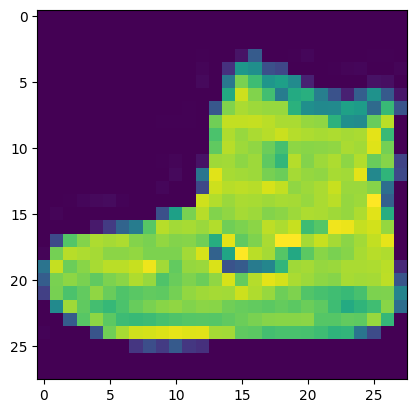

In [ ]:
plt.imshow(train_data[0])

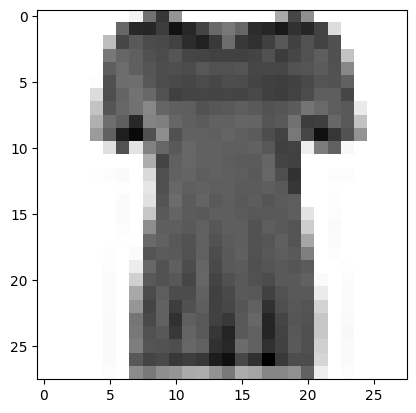

In [ ]:
plt.imshow(train_data[10], cmap=plt.cm.binary)

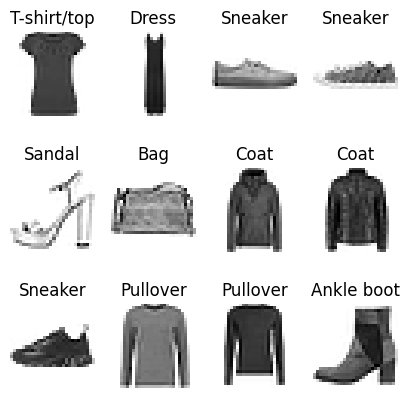

In [ ]:
plt.figure(figsize=(5,5))
for i in range(12):
    select_index = random.randint(0,60000)
    ax = plt.subplot(3,4, i+1)
    plt.imshow(train_data[select_index], cmap=plt.cm.binary)
    plt.title(label_decoder[train_labels[select_index]])
    plt.axis(False)

# Model - 1

## Creating and Compiling The Model

In [ ]:
tf.random.set_seed(42)

my_model_1 = tf.keras.Sequential()
my_model_1.add(tf.keras.layers.Flatten(input_shape=(28,28)))
my_model_1.add(tf.keras.layers.Dense(4, activation="relu"))
my_model_1.add(tf.keras.layers.Dense(4, activation="relu"))
my_model_1.add(tf.keras.layers.Dense(10, activation="softmax"))

my_model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

my_model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,210 (12.54 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

## Building The Model

In [ ]:
model_history_1 = my_model_1.fit(train_data,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0971 - loss: 2.5599 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0989 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0993 - loss: 2.3087 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0985 - loss: 2.3028 

# Model - 2

## Normalizing the data
--> Normalizing the data means keeping the train and test data between 0 and 1. It is achieved by dividing the test_data by the max value. Here it is 255.

In [ ]:
train_data_normalized = train_data/255
test_data_normalized = test_data/255

print("# Data Before Normalization #")
print("Min value:",train_data.min(),"Max value:", train_data.max())
print("# Data After Normalization #")
print("Min value:",train_data_normalized.min(),"Max value:", train_data_normalized.max())

# Data Before Normalization #
Min value: 0 Max value: 255
# Data After Normalization #
Min value: 0.0 Max value: 1.0


In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3* 10**(epoch/20))

model_history_2 = my_model_1.fit(train_data_normalized,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data_normalized, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027 - learning_rate: 0.0011
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0995 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027 - learning_rate: 0.0013
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0994 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027 - learning_rate: 0.0014
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0994 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3028 - learning_rate: 0.0016
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0993 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3028 - learning_rate: 0.0018
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0996 - l

Text(0.5, 1.0, 'Finding Ideal Learning Rate')

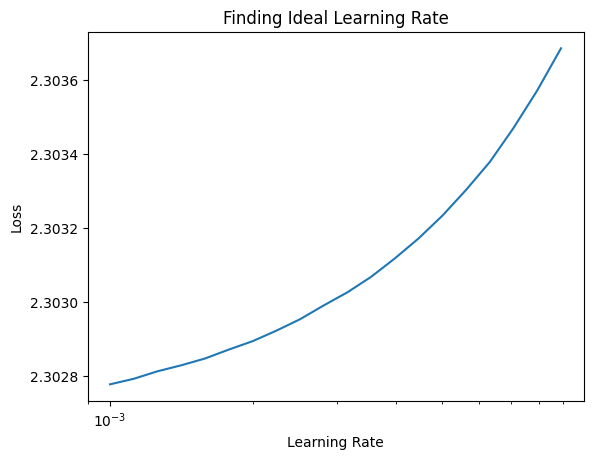

In [ ]:
lrs = 1e-3*(10**(tf.range(20)/20))
plt.semilogx(lrs, model_history_2.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning Rate")

We can see from the graph above, the slope is steepest at learning rate 10<sup>-3</sup>. This is actually the default learning rate of Adam() in tensorflow library. So we do not need to tune the learning rate for better performance in this case.

## Confusion Matrix function creation

In [ ]:
def pltConfusionMatrix(y_true, y_pred, classes=None, size=(10,10), text_size=15):
    my_cm = confusion_matrix(y_true, y_pred)
    my_cm_normalized = cm.astype("float")/ cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, axis = plt.subplots(figsize = size)
    c_axis = axis.matshow(my_cm, cmap=plt.cm.Blues)
    fig.colorbar(c_axis)

    if classes:
        labels = classes
    else:
        labels = np.arange(my_cm.shape[0])

    axis.set(title = "< Confusion Matrix >",
             xlabel = "Predicted Label",
             ylabel = "True Label",
             xticks = np.arange(n_classes),
             yticks = np.arange(n_classes),
             xticklabels=labels,
             yticklabels=labels)

    axis.xaxis.set_label_position("bottom")
    axis.xaxis.tick_bottom()

    axis.yaxis.label.set_size(text_size)
    axis.xaxis.label.set_size(text_size)
    axis.title.set_size(text_size)

    threshold = (my_cm.max() + my_cm.min())/2.

    for i, j in itertools.product(range(my_cm.shape[0]), range(my_cm.shape[1])):
        plt.text(j,i, f"{my_cm[i,j]} ({my_cm_normalized[i,j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if my_cm[i,j] > threshold else "black",
                 size = text_size)


In [ ]:
y_probabilities = my_model_1.predict(test_data_normalized)
y_predictions = y_probabilities.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print("### These are probabilities for a single prediction ###")
print(y_probabilities[0])

print("### This is the actual predicted class ###")
print(y_predictions[0])


### These are probabilities for a single prediction ###
[0.09608857 0.09888523 0.10304218 0.09582149 0.093804   0.09917051
 0.10997165 0.1080392  0.098513   0.09666407]
### This is the actual predicted class ###
6


In [ ]:
s